In [1]:
'''
观察CUB数据集中训练集和测试集的类别分布
'''

'\n观察CUB数据集中训练集和测试集的类别分布\n'

In [2]:
import os 

root_path = '/datasets/CUB/CUB_200_2011'
assert os.path.exists(root_path), '{} root path is not exists...'.format(root_path)

image_txt_path = os.path.join(root_path, 'images.txt')
train_test_path = os.path.join(root_path, 'train_test_split.txt')
assert os.path.exists(image_txt_path), '{} images.txt is not exists...'.format(image_txt_path)
assert os.path.exists(train_test_path), '{} train_test_split.txt file is not exists...'.format(train_test_path)

In [3]:
# image_class_id: image_id -> label
# train_test: image_id

image_class_id = {}
with open(image_txt_path) as f:
    for line in f:
        image_id, label = line.split()
        image_class_id[image_id] = int(label.split('.')[0]) - 1

train_test = []
with open(train_test_path) as f:
    for line in f:
        image_id, sysb = line.split()
        if int(sysb) == 1:
            train_test.append(image_id)

print(len(image_class_id))
print(len(train_test))

11788
5994


In [4]:
import pandas as pd

df = pd.DataFrame(image_class_id, index=[0]).T
df.head()

,0
1,0
2,0
3,0
4,0
5,0


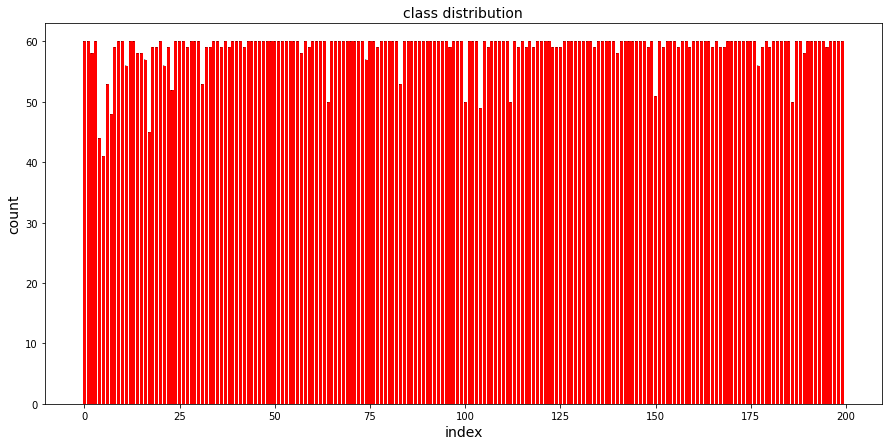

In [5]:
import matplotlib.pyplot as plt

class_count = df.groupby(0)[0].count()

f = plt.figure(figsize=(15, 7))
f.add_subplot(111)

plt.bar(class_count.index, class_count.values, color='red')
for i in class_count.index:
    plt.text(i, class_count.values[i], str(class_count.values[i]), horizontalalignment='center', fontsize=2)
plt.xlabel('index', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('class distribution', fontsize=14)
# plt.xticks(class_count.index)
plt.show()